<a href="https://colab.research.google.com/github/sriram1105-m/CE888---Data-Science-and-Decision-Making/blob/main/Project1/Wildfire_VGG19_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import PIL
from PIL import Image

import keras

In [3]:
# Loading the dataset
image_train = keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/OneDrive_1_1-27-2021.zip (Unzipped Files)/Training.zip (Unzipped Files)/Training',
                                                          labels  = "inferred", label_mode = "int", color_mode = "rgb")

image_test = keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/OneDrive_1_1-27-2021.zip (Unzipped Files)/Test.zip (Unzipped Files)/Test',
                                                          labels  = "inferred", label_mode = "int", color_mode = "rgb")

Found 39375 files belonging to 2 classes.
Found 8617 files belonging to 2 classes.


In [4]:
# Identifying the labels
labels = os.listdir('/content/drive/MyDrive/OneDrive_1_1-27-2021.zip (Unzipped Files)/Training.zip (Unzipped Files)/Training')
print(labels)

['No_Fire', 'Fire']


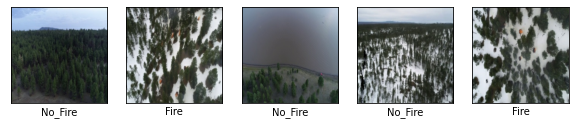

In [6]:
# Get the list of class names
# The encoded number is the index of the class_names list
class_name = image_train.class_names

fig,ax = plt.subplots(1,5,figsize=(10,10))
ax = ax.flat

# Get the first batch of dataset, it has batch_size(64) images and corresponding labels
# Let's show the first 25 images
for images,labels in image_train.take(1):
    for i in range(5):
        ax[i].imshow(images[i].numpy().astype('uint8'))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(class_name[labels[i]])
plt.show()

In [7]:
# Importing the required libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [9]:
# Data Preprocessing
#Image Data Generator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,   # Stretches and slant the image to a particular angle
                                   rotation_range = 20, # randomly rotates the image so that the model become inavariant to object orientation
                                   zoom_range = 0.2,    #randomly zoom-in or zoom-out the image
                                   brightness_range = [0.8, 1.2], #range changes the brightness of the image
                                   horizontal_flip = True) #randomly flips the image horizontally

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/OneDrive_1_1-27-2021.zip (Unzipped Files)/Training.zip (Unzipped Files)/Training',
                                                  target_size = (224, 224),
                                                  batch_size = 32,
                                                  class_mode = 'binary', shuffle = True)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/OneDrive_1_1-27-2021.zip (Unzipped Files)/Test.zip (Unzipped Files)/Test',
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'binary')

Found 39375 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


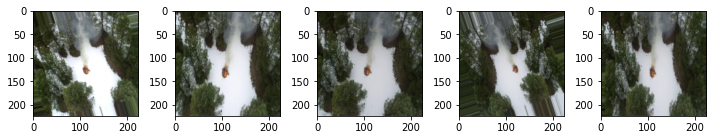

In [11]:
# Visualizing images after augmenting
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [training_set[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
# Finding the class Index
training_set.class_indices

{'Fire': 0, 'No_Fire': 1}

In [13]:
# Utilizing Class weight method to balance the class label

from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(training_set.classes), 
                training_set.classes) 

class_weights = dict(enumerate(class_weights))

In [15]:
# Printing the computed weights for both the classes

class_weights

{0: 0.7869334079462786, 1: 1.371282301316431}

In [ ]:
plt.plot(swish.history.history['accuracy'],c='red')
plt.plot(swish.history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left', bbox_to_anchor = (1,1))

In [ ]:
vgg16v2.metrics_names


In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']


In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy')

plt.plot(loss, label='Loss')

plt.legend(loc='lower right')

plt.ylabel('Accuracy')

plt.ylim([min(plt.ylim()),1])

plt.title('Training and Loss')


In [ ]:
from keras.models import load_model

model1 = load_model('/content/drive/MyDrive/vgg_swish.h5')

In [ ]:
score = model1.evaluate(test_set)
print("Test Loss: %.2f%%" % (score[0]*100))
print("Test Accuracy: %.2f%%" % (score[1]*100))

270/270 [==============================] - 35s 130ms/step - loss: 0.9182 - accuracy: 0.6585
Test Loss: 91.82%
Test Accuracy: 65.85%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Y_pred = model1.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_set.classes, y_pred)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
